In [46]:
!pip install opencv-python-headless opencv-contrib-python-headless


In [47]:
!apt-get install -y libzbar0


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [48]:
!pip install pyzbar


In [49]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive
from pyzbar.pyzbar import decode, ZBarSymbol


In [50]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Path ke folder dataset di Google Drive
dataset_path = '/content/drive/MyDrive/barcode dataset/barcode/'

# Filter semua file gambar valid
def is_image_file(filename):
    ext = os.path.splitext(filename)[1].lower()
    return ext in ['.png', '.jpg', '.jpeg']

# Ambil semua file gambar valid
valid_images = [f for f in os.listdir(dataset_path) if is_image_file(f)]
print(f"Jumlah file gambar valid: {len(valid_images)}")

# Menampilkan nama beberapa gambar sebagai contoh
print("Beberapa file gambar:", valid_images[:5])

Jumlah file gambar valid: 108
Beberapa file gambar: ['8993137002035.jpg', '8991748011088.jpg', '8998103100685.jpg', '8886008101053.jpg', '46016620035550.png']


In [52]:
# Memproses gambar dan membaca barcode
images = []
labels = []

for img_name in valid_images:
    img_path = os.path.join(dataset_path, img_name)
    try:
        # Verifikasi file gambar menggunakan PIL
        with Image.open(img_path) as img:
            img.verify()  # Pastikan file valid

        # Baca gambar menggunakan OpenCV
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Pastikan gambar berhasil dibaca
        if img is None or img.size == 0:
            print(f"Gambar kosong atau tidak dapat dibaca: {img_name}")
            continue

        # Preprocessing tambahan untuk meningkatkan deteksi
        img = cv2.resize(img, (300, 300))
        _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Decode barcode menggunakan pyzbar
        decoded_objects = decode(img, symbols=[ZBarSymbol.EAN13, ZBarSymbol.CODE128])
        if not decoded_objects:
            print(f"Barcode di {img_name}: error.")
            continue

        # Ambil data dari barcode
        for obj in decoded_objects:
            barcode_data = obj.data.decode('utf-8')
            labels.append(int(barcode_data))
            images.append(cv2.resize(img, (128, 128)))
            print(f"Barcode di {img_name}: {barcode_data}")

    except Exception as e:
        # Log error
        print(f"Gagal memproses {img_name}: {e}")

# Konversi ke array numpy
images = np.array(images).astype('float32') / 255.0  # Normalisasi pixel
labels = np.array(labels)

Barcode di 8993137002035.jpg: 8993137002035
Barcode di 8991748011088.jpg: 8991748011088
Barcode di 8998103100685.jpg: 8998103100685
Barcode di 8886008101053.jpg: 8886008101053
Barcode di 46016620035550.png: 4601662003550
Barcode di 8992745550396.jpg: 8992745550396
Barcode di 5707119036832.jpg: 5707119036832
Barcode di 4897026614122.jpg: 4897026614122
Barcode di 3374650299174.jpg: 3374650299174
Barcode di 6957303864508 (1).jpg: 6957303864508
Barcode di 8993200669134.jpg: 8993200669134
Barcode di 859174003955.png: 0859174003955
Barcode di 051000063922.png: 0051000063922
Barcode di 639277549730.png: 0639277549730
Barcode di 850019194197.png: 0850019194197
Barcode di 684765870155.png: 0684765870155
Barcode di 8901595863051.png: 8901595863051
Barcode di 4606272009671.png: 4606272009671
Barcode di 4607051154063.png: error.
Barcode di 4607008160338.png: 4607008160338
Barcode di 4665300017811.png: 4665300017811
Barcode di 8886022941048.jpg: 8886022941048
Barcode di 3607343588492.jpg: 360734358

In [53]:
# Output jumlah gambar yang berhasil diproses
print(f"Jumlah gambar yang berhasil dibaca: {len(images)}")
print(f"Contoh label: {labels[:5]}")

Jumlah gambar yang berhasil dibaca: 94
Contoh label: [8993137002035 8991748011088 8998103100685 8886008101053 4601662003550]


In [12]:
print(f"Bentuk gambar: {images.shape}")


Bentuk gambar: (94, 128, 128)


In [39]:
import pandas as pd

# Output dari proses deteksi
output_text = """
Barcode di 8993137002035.jpg: 8993137002035
Barcode di 8991748011088.jpg: 8991748011088
Barcode di 8998103100685.jpg: 8998103100685
Barcode di 8886008101053.jpg: 8886008101053
Barcode di 46016620035550.png: 4601662003550
Barcode di 8992745550396.jpg: 8992745550396
Barcode di 5707119036832.jpg: 5707119036832
Barcode di 4897026614122.jpg: 4897026614122
Barcode di 3374650299174.jpg: 3374650299174
Barcode di 6957303864508 (1).jpg: 6957303864508
Barcode di 8993200669134.jpg: 8993200669134
Barcode di 859174003955.png: 0859174003955
Barcode di 051000063922.png: 0051000063922
Barcode di 639277549730.png: 0639277549730
Barcode di 850019194197.png: 0850019194197
Barcode di 684765870155.png: 0684765870155
Barcode di 8901595863051.png: 8901595863051
Barcode di 4606272009671.png: 4606272009671
Barcode di 4607051154063.png: error.
Barcode di 4607008160338.png: 4607008160338
Barcode di 4665300017811.png: 4665300017811
Barcode di 8886022941048.jpg: 8886022941048
Barcode di 3607343588492.jpg: 3607343588492
Barcode di 5000218005687.png: 5000218005687
Barcode di 8999777007058.jpg: 8999777007058
Barcode di 8998866107112.jpg: 8998866107112
Barcode di 4902430553643.jpg: 4902430553643
Barcode di 8992727007948 (1).jpg: 8992727007948
Barcode di 8992761136161.jpg: 8992761136161
Barcode di 071930000156.png: 0071930000156
Barcode di 8996001600269.jpg: 8996001600269
Barcode di 8992750540405.jpg: 8992750540405
Barcode di 8997012330770.jpg: 8991072330770
Barcode di 8997012330770.jpg: 8997012330770
Barcode di 8993176811094.jpg: 8993176811094
Barcode di 7622201105716.png: 7622201105716
Barcode di 4650065524506.png: 4650065524506
Barcode di 8992779269103.jpg: 8992779269103
Barcode di 5900516690915.png: 5900516690915
Barcode di 4606068026776.png: error.
Barcode di 4601780016814.png: 4601780016814
Barcode di 4607100622093.png: 4607100622093
Barcode di 7622210453853.png: 7622210453853
Barcode di 4620011583154.png: 4620011583154
Barcode di 4600935300105.png: 4600935300105
Barcode di 4005900172112.png: 4005900172112
Barcode di 2010002996414.png: 2010002996414
Barcode di 4607065734091.png: 4607065734091
Barcode di 4602701303259.png: error.
Barcode di 46206176.png: error.
Barcode di 4680002312873 (1).png: 4680002312873
Barcode di 4605922001812.png: 4605922001812
Barcode di 4603290004817 (1).png: 4603290004817
Barcode di 4680002312873.png: 4680002312873
Barcode di 4820176893086.png: 4820176893086
Barcode di 2005282881000.png: 2005282881000
Barcode di 5995327275147.png: 5995327275147
Barcode di 4670016720320.png: 4670016720320
Barcode di 4605246006333.png: error.
Barcode di 4603566931953.png: error.
Barcode di 3574661171883.png: error.
Barcode di 4610007391108.png: error.
Barcode di 4620754103367.png: 4620754103367
Barcode di 4607084352542.png: error.
Barcode di 9785389060128.png: error.
Barcode di 4605246017162.png: error.
Barcode di 4607065580193.png: 4607065580193
Barcode di 4607052430012.png: 4607052430012
Barcode di 4631136742784.png: 4631136742784
Barcode di 4601669007681.png: 4601669007681
Barcode di 4602121008444.png: 4602121008444
Barcode di 4607001771555.png: error.
Barcode di 4600680000640.png: 4600680000640
Barcode di 4640001890031.png: 4640001890031
Barcode di 4607003861575.png: error.
Barcode di 4600286109112.png: 4600286109112
Barcode di 8001841474984.png: 8001841474984
Barcode di 4610032770015.png: 4610032770015
Barcode di 54491472.png: error.
Barcode di 8717644585085.png: 8717644585085
Barcode di 7613037059694.png: 7613037059694
Barcode di 4607042434877.png: 4607042434877
Barcode di 8033123220170.png: 8033123220170
Barcode di 4607124893677.png: 4607124893677
Barcode di 4602920005491.png: 4602920005491
Barcode di 9785171132330.png: 9785171132330
Barcode di 5000158071032.png: 5000158071032
Barcode di 4610144802055.png: 4610144802055
Barcode di 8992727007948.jpg: 8992727007948
Barcode di 46177889.png: error.
Barcode di 4902430110747.jpg: 4902430110747
Barcode di 4605362006217.png: 4605362006217
Barcode di 8999999580766.jpg: 8999999580766
Barcode di 4607029053077.png: 4607029053077
Barcode di 8998899995090.jpg: 8998899995090
Barcode di 4606038067754.png: 4606038067754
Barcode di 8992222053013.jpg: 8992222053013
Barcode di 4600778009036.png: 4600778009036
Barcode di 4604248000554.png: 4604248000554
Barcode di 4891338007962.jpg: 4891338007962
Barcode di 4603290004817.png: 4603290004817
Barcode di 4600699514817.png: 4600699514817
Barcode di 4607163090228.png: 4607163090228
Barcode di 4606055005807.png: 4606055005807
Barcode di 8990121011073.jpg: 8990121011073
Barcode di 6957303864508.jpg: 6957303864508
Barcode di 8906120100854.png: 8906120100854
Barcode di 8906137431873.png: 8906137431873
Barcode di 8594012793064.png: 8594012793064
"""

# Parsing data
data = []
for line in output_text.strip().split("\n"):
    if ": " in line:
        parts = line.split(": ")
        file_name = parts[0].replace("Barcode di ", "").strip()
        id_barcode = parts[1].strip()
        data.append({"nama_file": file_name, "id_barcode": id_barcode})

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Simpan dataset ke file CSV (opsional)
dataset_path = "barcode_id_dataset.csv"
df.to_csv(dataset_path, index=False)

print("Dataset berhasil dibuat:")
print(df)

Dataset berhasil dibuat:
              nama_file     id_barcode
0     8993137002035.jpg  8993137002035
1     8991748011088.jpg  8991748011088
2     8998103100685.jpg  8998103100685
3     8886008101053.jpg  8886008101053
4    46016620035550.png  4601662003550
..                  ...            ...
104   8990121011073.jpg  8990121011073
105   6957303864508.jpg  6957303864508
106   8906120100854.png  8906120100854
107   8906137431873.png  8906137431873
108   8594012793064.png  8594012793064

[109 rows x 2 columns]


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Load dataset
dataset_path = "barcode_id_dataset.csv"
df = pd.read_csv(dataset_path)

# Buat target binary (1 = benar, 0 = error)
df['is_correct'] = df['id_barcode'].apply(lambda x: 0 if x == 'error.' else 1)

# 2. Text preprocessing (Tokenize nama_file)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['nama_file'])
max_len = max(df['nama_file'].apply(lambda x: len(x.split())))
X = tokenizer.texts_to_sequences(df['nama_file'])
X = pad_sequences(X, maxlen=max_len)

# Target
y = df['is_correct'].values

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model definition
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 50  # Dimensi embedding layer

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 5. Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 7. Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.5158 - loss: 0.6920 - val_accuracy: 0.8636 - val_loss: 0.6779
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8373 - loss: 0.6723 - val_accuracy: 0.8636 - val_loss: 0.6595
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8412 - loss: 0.6533 - val_accuracy: 0.8636 - val_loss: 0.6402
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8724 - loss: 0.6279 - val_accuracy: 0.8636 - val_loss: 0.6186
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8724 - loss: 0.6007 - val_accuracy: 0.8636 - val_loss: 0.5944
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8920 - loss: 0.5665 - val_accuracy: 0.8636 - val_loss: 0.5677
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8685 - loss: 0.5411 - val_accuracy: 0.8636 - val_loss: 0.5395
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8646 - loss: 0.5050 - val_accuracy: 0.8636 - val_loss: 0.5099

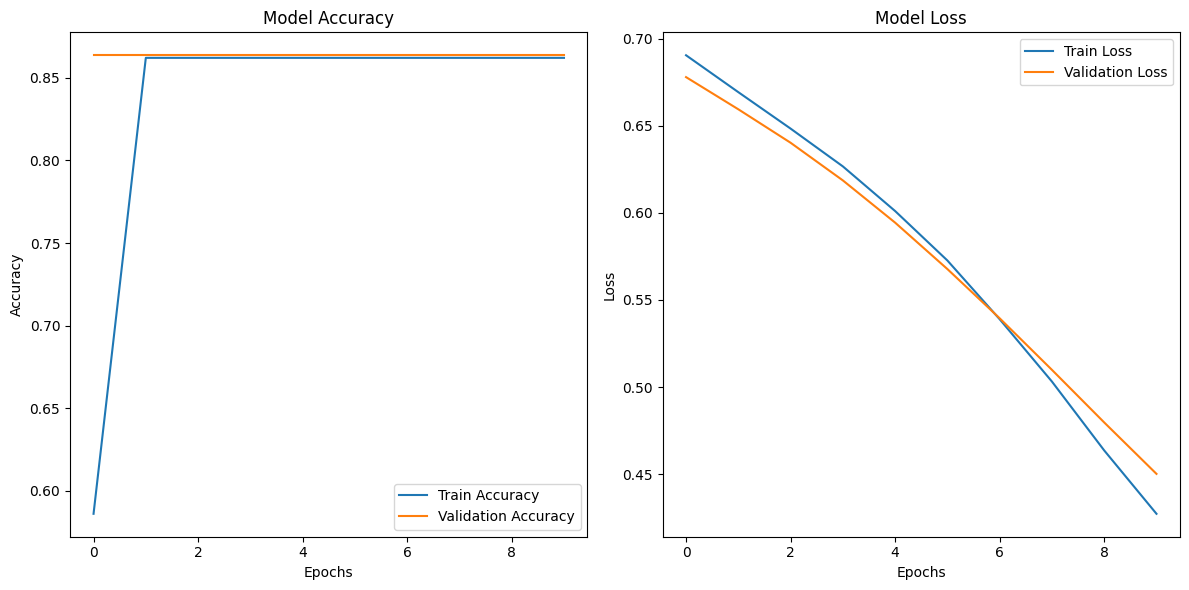

In [44]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()